# Convolutional Neural Network (CNN)
A Convolutional Neural Network (CNN) is a specialized class of deep neural networks designed to process grid-structured data, most commonly images. CNNs automatically learn spatial hierarchies of features—from low-level patterns (edges, textures) to high-level concepts (objects, faces).

From a data science perspective, CNNs are powerful because they:

- Reduce manual feature engineering

- Preserve spatial relationships

- Scale well to high-dimensional inputs (e.g., images)

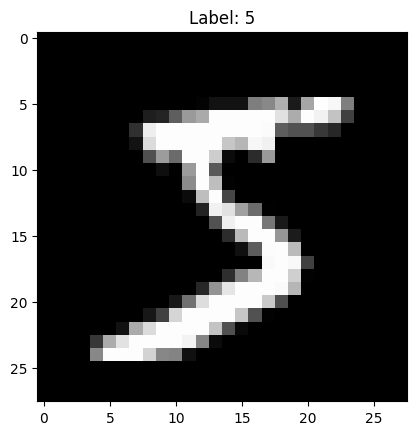

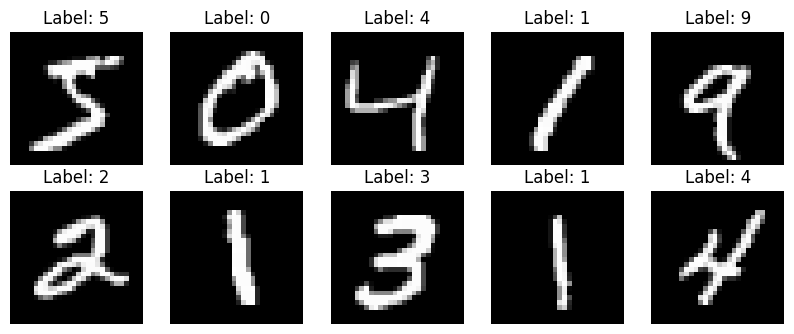

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Loade the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.grid(False)
    
    plt.axis('off')
plt.show()


In [2]:
# explore the shape of the dataset
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}')


Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


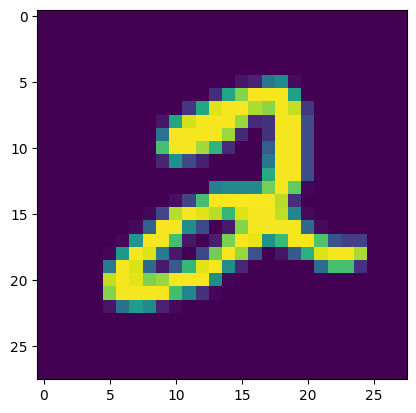

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

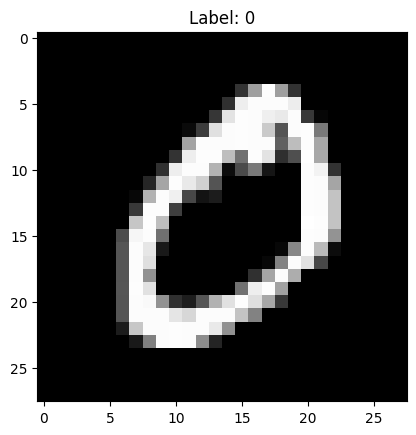

In [3]:
plt.imshow(x_train[1], cmap='gray')
plt.title(f'Label: {y_train[1]}')
plt.show()

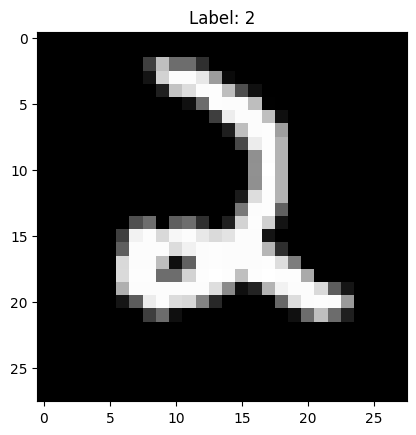

In [16]:
import random
rand_index = random.randint(0, x_train.shape[0] - 1)
plt.imshow(x_train[rand_index], cmap='gray')
plt.title(f'Label: {y_train[rand_index]}')  
plt.show()

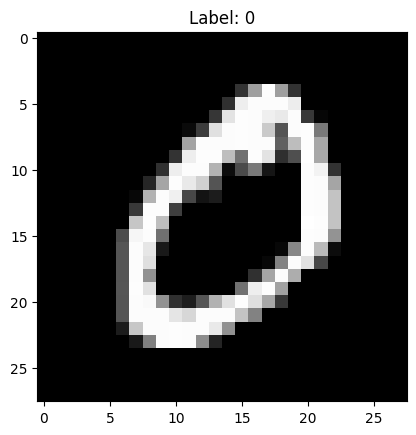

Pixel values of the first image:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253

In [4]:
# display the pixel values of the first image
plt.imshow(x_train[1], cmap='gray')
plt.title(f'Label: {y_train[1]}')
plt.grid(False)
plt.show()

# display the values of each pixel in the image
print("Pixel values of the first image:")
for row in x_train[1]:
    
    for pixel in row:
        print(f'{pixel:3}', end=' ')    
    print()  # New line after each row

In [5]:
# also need to change the data  types to float32 data normallize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Pixel values of the first image after normalization:
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.20 0.62 0.99 0.62 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.19 0.93 0.99 0.99 0.99 0.93 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.21 0.89 0.99 0.99 0.94 0.91 0.99 0

<Axes: >

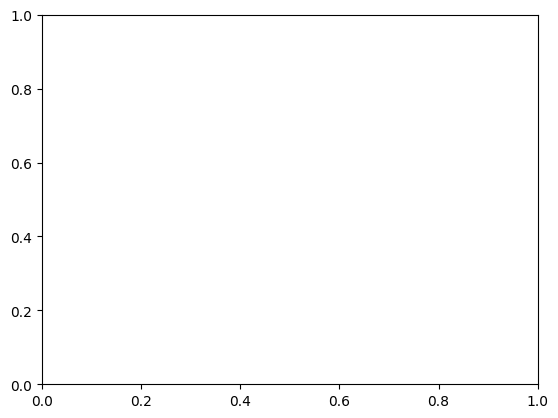

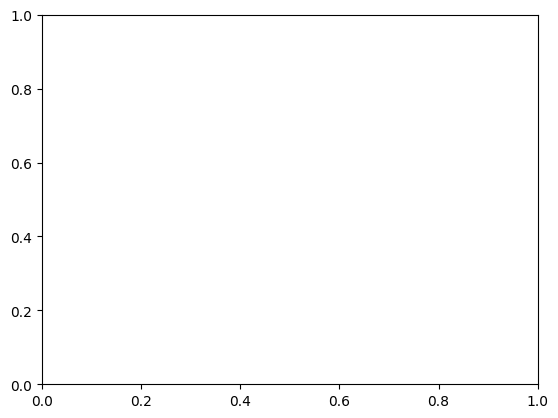

In [6]:
# Display the values of each pixel in the image after normalizaion
print("Pixel values of the first image after normalization:")
for row in x_train[1]:
    
    for pixel in row:
        print(f'{pixel:.2f}', end=' ')    
    print()  # New line after each row
    
# Reshape the data to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))   
print(f'New training data shape: {x_train.shape}')
print(f'New testing data shape: {x_test.shape}')
# Display the shape after reshaping
display(plt.gca())
display(plt.gcf())    

## Build the model

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))# 28x28 pixels images with a single color channel

# CNN model building
model = models.Sequential(
    [
        input_layer,
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ]
) 


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
# train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9436 - loss: 0.1887 - val_accuracy: 0.9830 - val_loss: 0.0564
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9831 - loss: 0.0534 - val_accuracy: 0.9883 - val_loss: 0.0430
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9872 - val_loss: 0.0494
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9890 - val_loss: 0.0384
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9883 - val_loss: 0.0432


In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 - 1s - 2ms/step - accuracy: 0.9880 - loss: 0.0381

Test accuracy: 0.9879999756813049
Test loss: 0.03806111589074135


In [20]:
# save the model
model.save('mnist_cnn_model.h5')

---

In [21]:
# grab a sample image from the test set
sample_image = x_test[0]
sample_image_reshaped = sample_image.reshape((1, 28, 28, 1))  # Reshape for prediction
# make a prediction
predictions = model.predict(sample_image_reshaped)
predicted_label = tf.argmax(predictions[0]).numpy()
print(f'Predicted label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted label: 7


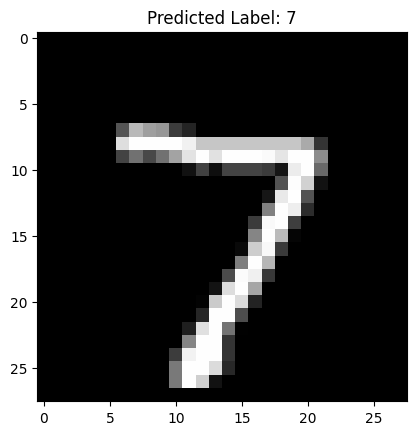

In [22]:
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

In [25]:
# predict on multiple images
sample_images = x_test[:5]
predictions = model.predict(sample_images)
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]
print(f'Predicted labels for the first 5 test images: {predicted_labels}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted labels for the first 5 test images: [np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]
